In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls 'drive/MyDrive/ML project'

test.csv  train.csv


In [ ]:
train_path = "/content/drive/MyDrive/ML project/train.csv"
test_path = "/content/drive/MyDrive/ML project/test.csv"

In [ ]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (103904, 25)
Test shape: (25976, 25)


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
print(train_df.describe())

          Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000

In [ ]:
print(train_df['satisfaction'].value_counts())

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

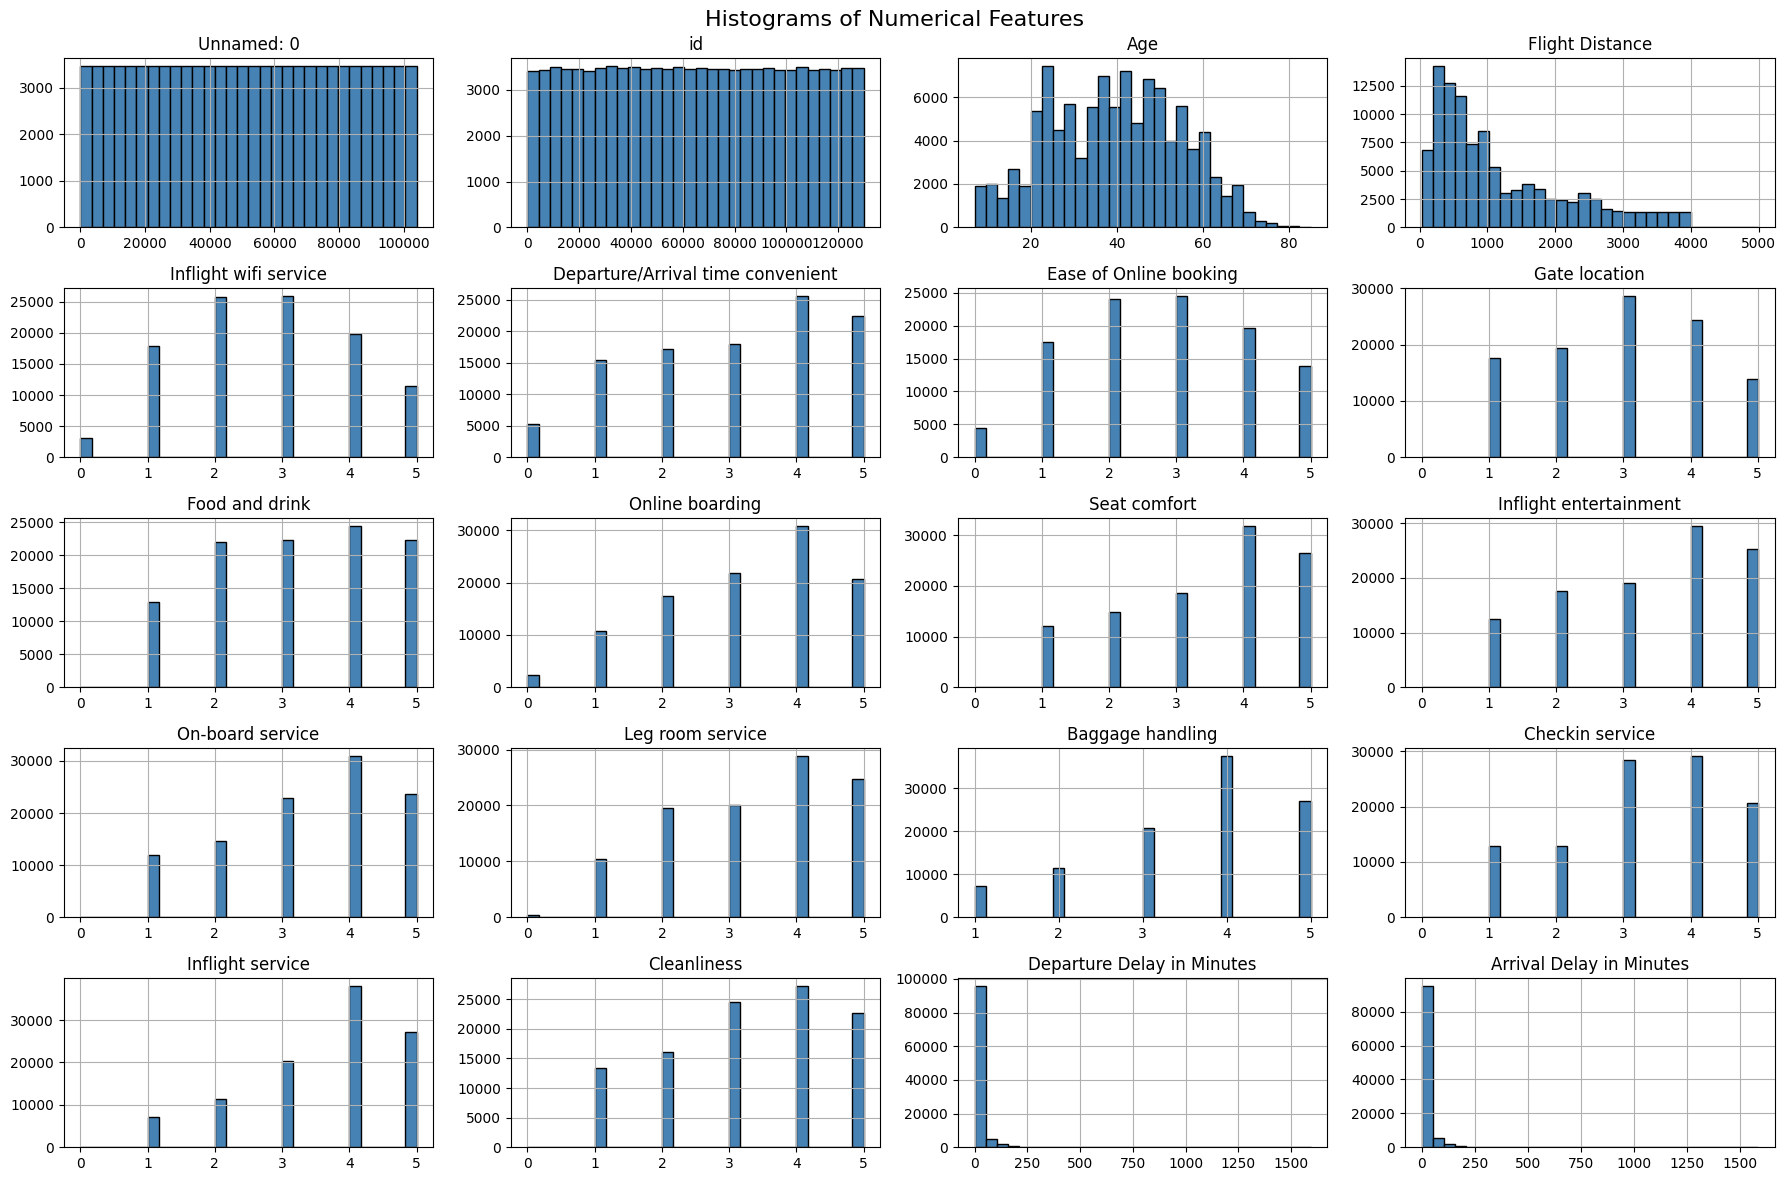

In [ ]:

# Get all numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
train_df[numerical_cols].hist(bins=30, figsize=(18, 12), color='steelblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
columns_to_drop = ['Unnamed: 0', 'id']
train_df.drop(columns=columns_to_drop, axis=1, inplace=True)
test_df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [ ]:
# Encode satisfaction using .replace() instead of map/lambda
train_df['satisfaction'] = train_df['satisfaction'].replace({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})

test_df['satisfaction'] = test_df['satisfaction'].replace({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})


<ipython-input-19-90cb950da477>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['satisfaction'] = train_df['satisfaction'].replace({
<ipython-input-19-90cb950da477>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['satisfaction'] = test_df['satisfaction'].replace({


In [ ]:
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    train_df[col].fillna(train_df[col].mean(), inplace=True)
    test_df[col].fillna(test_df[col].mean(), inplace=True)


<ipython-input-20-0c98e7cb35b8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mean(), inplace=True)
<ipython-input-20-0c98e7cb35b8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [ ]:
# Step 4: Encode categorical features using LabelEncoder
label_encoders = {}
categorical_cols = train_df.select_dtypes(include='object').columns


for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

    label_encoders[col] = le

print("✅ Categorical features encoded and encoders saved.")

✅ Categorical features encoded and encoders saved.


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = train_df.drop('satisfaction', axis=1)
y = train_df['satisfaction']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (83123, 22)
Validation set shape: (20781, 22)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'  # helpful for slight imbalance
)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = dt_model.predict(X_val)

# Evaluate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Decision Tree - Validation Accuracy: {val_accuracy * 100:.2f}%")


Decision Tree - Validation Accuracy: 94.74%


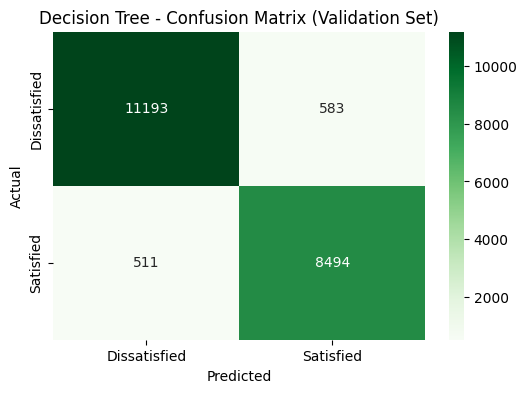

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
plt.title("Decision Tree - Confusion Matrix (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Textual evaluation metrics
print("Decision Tree - Classification Report (Validation Set):\n")
print(classification_report(y_val, y_val_pred, target_names=['Dissatisfied', 'Satisfied']))


Decision Tree - Classification Report (Validation Set):

              precision    recall  f1-score   support

Dissatisfied       0.96      0.95      0.95     11776
   Satisfied       0.94      0.94      0.94      9005

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



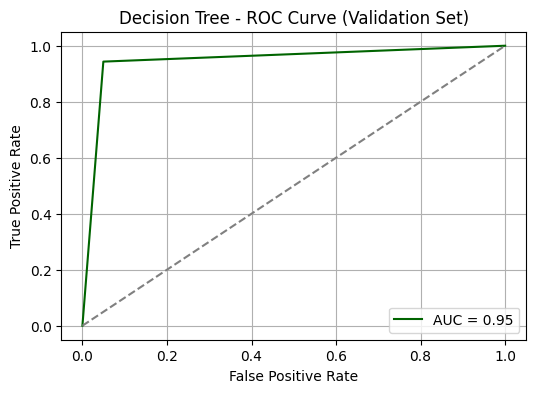

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC
y_val_proba = dt_model.predict_proba(X_val)[:, 1]

fpr, tpr, _ = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Decision Tree - ROC Curve (Validation Set)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Separate features and labels in test set
X_test = test_df.drop('satisfaction', axis=1)
y_test = test_df['satisfaction']


In [ ]:
# Predict on the test set
y_test_pred = dt_model.predict(X_test)

# Accuracy score
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Decision Tree - Test Accuracy: {test_acc * 100:.2f}%")


Decision Tree - Test Accuracy: 94.53%


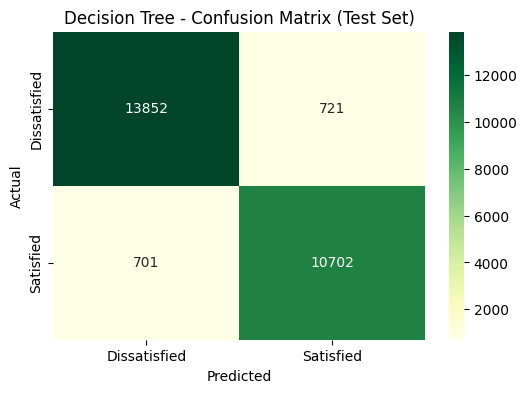

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='YlGn',
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
plt.title("Decision Tree - Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print("Decision Tree - Classification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred, target_names=['Dissatisfied', 'Satisfied']))


Decision Tree - Classification Report (Test Set):

              precision    recall  f1-score   support

Dissatisfied       0.95      0.95      0.95     14573
   Satisfied       0.94      0.94      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.95      0.95      0.95     25976



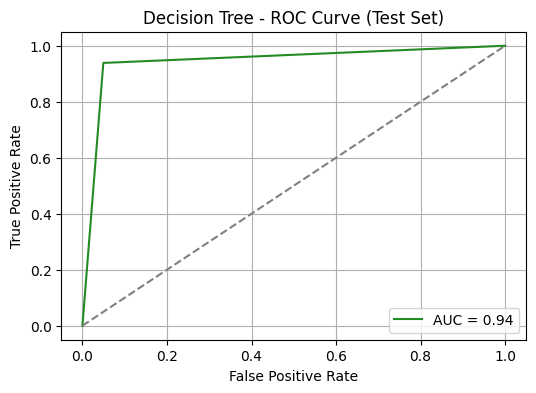

In [ ]:
from sklearn.metrics import roc_curve, auc

y_test_proba = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='forestgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Decision Tree - ROC Curve (Test Set)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
